# Ultimate Pig

In [1]:
import math
import random
import matplotlib.pyplot as plt
import statistics as st

In [2]:
%matplotlib inline

## Code

In [3]:
class PigGame:
    """
    Responsibilities:
    - Keep track of who is playing
    - Keep track of how many turns have occurred
    - End game if turn limit has been exceeded
    - Record player score
    - Report statistics on game
    - Iterate
    
    Collaborators:
    - Player
    """
    
    def __init__(self, player):
        self.player = player
        self.turn_limit = 7
        self.reset()
        
    def reset(self):
        self.turns = 0
        self.score = 0
        self.turn_scores = []
        
    def iterate(self):
        self.turn_scores.append(self.player.get_move())
        # .get_move() will need to return the score
        self.score += self.turn_scores[-1]
        self.turns += 1
    
    def is_game_over(self):
        if self.turns == self.turn_limit:
            return True
        else:
            return False
    
    def game_stats(self):
        return {
            'turn': self.turns,
            'score': self.score,
            'turn_score': self.turn_scores[self.turns - 1]
            }
    
    def run_pig_sim(self):
        self.reset()
        while not self.is_game_over():
            self.iterate()
        return self.score       
        

In [4]:
class Player:
    """
    Responsibilities:
    - Keep track of score during turn
    - Roll dice
    """
    def __init__(self):
        self.turn_score = []

    def roll_dice(self):
        '''Returns random dice roll value'''
        self.turn_score.append(random.randint(1, 6))
            

In [5]:
class OneRoller(Player):
    def __init__(self):
        super().__init__()
        
    def get_move(self):
        self.turn_score = []
        self.roll_dice()
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)

In [6]:
class TwoRoller(Player):
    def __init__(self):
        super().__init__()
        
    def get_move(self):
        self.turn_score = []
        [self.roll_dice() for _ in range(2)]
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)

In [7]:
class ThreeRoller(Player):
    
    def __init__(self):
        super().__init__()
    
    def get_move(self):
        self.turn_score = []
        [self.roll_dice() for _ in range(3)]
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)


In [8]:
class FourRoller(Player):
    
    def __init__(self):
        super().__init__()
    
    def get_move(self):
        self.turn_score = []
        [self.roll_dice() for _ in range(4)]
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)

In [9]:
class VariRoller(Player):
    
    def __init__(self, num_rolls=3):
        super().__init__()
        self.num_rolls = num_rolls
    
    def get_move(self):
        self.turn_score = []
        [self.roll_dice() for _ in range(self.num_rolls)]
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)

In [10]:
class VariHold(Player):
    
    def __init__(self, hold_num=18):
        super().__init__()
        self.hold_num = hold_num
    
    def get_move(self):
        self.turn_score = []
        while sum(self.turn_score) < self.hold_num:
            self.roll_dice()
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)

In [11]:
def pig_trials(player, num_trials=10000):
    """
    Run num_trials of with player
    - Returns score, number of 0 score turns for each trial
    """
    trial_stats = []
    for idx in range(num_trials):
        game = PigGame(player)
        game_data = game.run_pig_sim()
        trial_stats.append(game)
    return trial_stats

## Let's Roll!

In [111]:
angie = OneRoller()
angie_data = pig_trials(angie, 1000000)

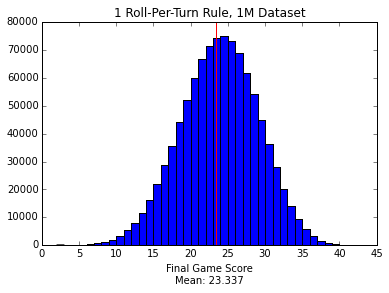

In [119]:
angie_list = [game_data.score for game_data in angie_data]
plt.hist(angie_list, bins = 40)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(angie_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(angie_list)))
plt.title('1 Roll-Per-Turn Rule, 1M Dataset')
plt.show()

In [116]:
bernice = TwoRoller()
bernice_data = pig_trials(bernice, 1000000)

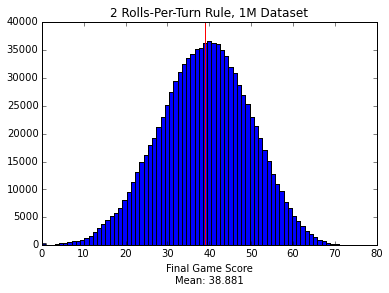

In [120]:
bernice_list = [game_data.score for game_data in bernice_data]
plt.hist(bernice_list, bins = 77)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(bernice_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(bernice_list)))
plt.title('2 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [121]:
cheryl = ThreeRoller()
cheryl_data = pig_trials(cheryl, 1000000)

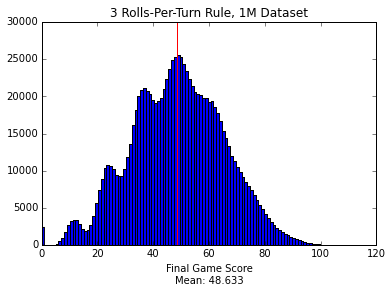

In [122]:
cheryl_list = [game_data.score for game_data in cheryl_data]
plt.hist(cheryl_list, bins = 107)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(cheryl_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(cheryl_list)))
plt.title('3 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [123]:
dana = FourRoller()
dana_data = pig_trials(dana, 1000000)

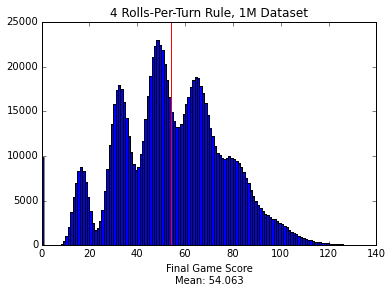

In [126]:
dana_list = [game_data.score for game_data in dana_data]
plt.hist(dana_list, bins = 138)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(dana_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(dana_list)))
plt.title('4 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [127]:
elise = VariRoller(5)
elise_data = pig_trials(elise, 1000000)

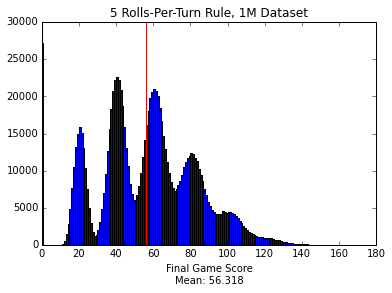

In [130]:
elise_list = [game_data.score for game_data in elise_data]
plt.hist(elise_list, bins = 168)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(elise_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(elise_list)))
plt.title('5 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [131]:
fay = VariRoller(6)
fay_data = pig_trials(fay, 1000000)

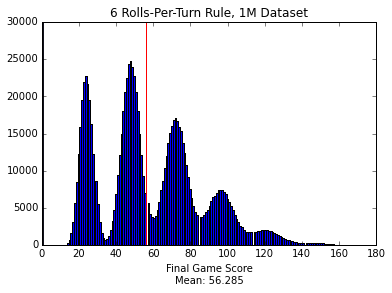

In [132]:
fay_list = [game_data.score for game_data in fay_data]
plt.hist(fay_list, bins = 205)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax/2)
plt.xlim(0, 180)
plt.vlines(st.mean(fay_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(fay_list)))
plt.title('6 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [133]:
gail = VariRoller(7)
gail_data = pig_trials(gail, 1000000)

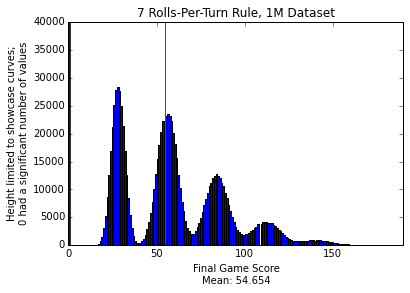

In [153]:
gail_list = [game_data.score for game_data in gail_data]
plt.hist(gail_list, bins = 222)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax/3)
plt.xlim(0, 190)
plt.vlines(st.mean(gail_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(gail_list)))
plt.title('7 Rolls-Per-Turn Rule, 1M Dataset')
plt.ylabel('Height limited to showcase curves;\n0 had a significant number of values')
plt.show()

In [154]:
hold_vari_roll_data = [pig_trials(VariRoller(n), 100000) for n in range(1,10)]

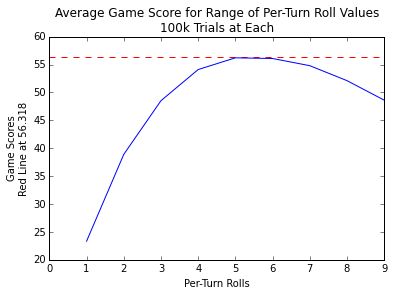

In [155]:
hold_num_vr_data_avgs = []
for n in range(9):
    temp = []
    for m in range(100000):
        temp.append(hold_vari_roll_data[n][m].score)
    hold_num_vr_data_avgs.append(st.mean(temp))
    
plt.plot(range(1,10), hold_num_vr_data_avgs)
plt.title('Average Game Score for Range of Per-Turn Roll Values\n100k Trials at Each')
plt.xlabel('Per-Turn Rolls')
plt.ylabel('Game Scores\nRed Line at 56.318')
plt.hlines(56.318, 0, 9, color='red', linestyle='dashed')
plt.show()

In [102]:
hold_num_data = [pig_trials(VariHold(n),100000) for n in range(1,36)]

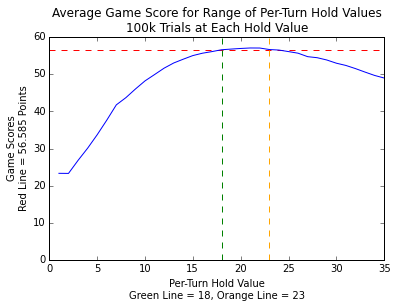

In [152]:
hold_num_data_avgs = []
for n in range(35):
    temp = []
    for m in range(100000):
        temp.append(hold_num_data[n][m].score)
    hold_num_data_avgs.append(st.mean(temp))
    
plt.plot(range(1,36), hold_num_data_avgs)
plt.title('Average Game Score for Range of Per-Turn Hold Values\n100k Trials at Each Hold Value')
plt.xlabel('Per-Turn Hold Value\nGreen Line = 18, Orange Line = 23')
plt.ylabel('Game Scores\nRed Line = 56.585 Points')
plt.hlines(56.585, 0, 35, color='red', linestyle='dashed')
plt.vlines(18, 0, 60, color='green', linestyle='dashed')
plt.vlines(23, 0, 60, color='orange', linestyle='dashed')
plt.show()

From the above, we can see that the ideal range starts at 18 and extends to 23. If we roll an 18, this means that a roll of 6 could put us over 23. Because this graph represents the mean score using the hold rule, we can see that the maximum totals occur at 22.

In [15]:
vincent = VariHold(18)
vincent_data = pig_trials(vincent, 1000000)

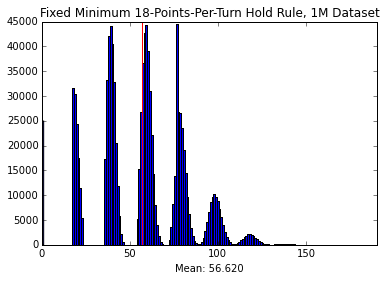

In [16]:
vincent_list = [game_data.score for game_data in vincent_data]
plt.hist(vincent_list, bins = 150)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.xlim(0, 190)
plt.vlines(st.mean(vincent_list), ymin, ymax , color='red')
plt.xlabel('Mean: {:.3f}'.format(st.mean(vincent_list)))
plt.title('Fixed Minimum 18-Points-Per-Turn Hold Rule, 1M Dataset')
plt.show()

In [12]:
ulysses_data = pig_trials(VariHold(22), 1000000)

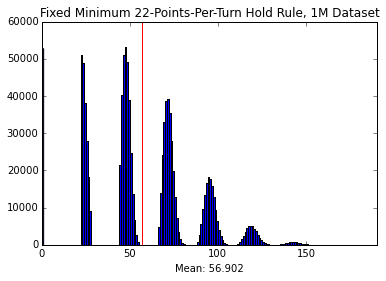

In [18]:
ulysses_list = [game_data.score for game_data in ulysses_data]
plt.hist(ulysses_list, bins = 178)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.xlim(0, 190)
plt.vlines(st.mean(ulysses_list), ymin, ymax , color='red')
plt.xlabel('Mean: {:.3f}'.format(st.mean(ulysses_list)))
plt.title('Fixed Minimum 22-Points-Per-Turn Hold Rule, 1M Dataset')
plt.show()

### Shape Analysis (applies to all)
Because there are 7 rounds, there are 7 opportunities to score points. If you "bust" on all turns, you get a 0 point game total. If you "bust" on all but 1, you'll get just the handful of points from that single set of rolls. As this progression of fewer and fewer "bust" turns per game continues, you end up with the highest possible scores. This is why the plots show the "fingers"—they represent the additive distributions of (n dice * 6) width. Thus, for small numbers of dice, the probability of getting points is higher and the overlap of these "fingers" is at its greatest. As the number of per-turn dice rolls increases, the overlap decreases and eventually become more distinct.

## Summary
### Fixed Roll-Per-Turn

**1 Roll-Per-Turn Rule:** Mean: 23.337

**2 Rolls-Per-Turn Rule:** Mean: 38.881

**3 Rolls-Per-Turn Rule:** Mean: 48.633

**4 Rolls-Per-Turn Rule:** Mean: 54.063

**5 Rolls-Per-Turn Rule:** Mean: **56.318**

**6 Rolls-Per-Turn Rule:** Mean: 56.285

**7 Rolls-Per-Turn Rule:** Mean: 54.654

### Fixed Minimum Per-Turn Hold
Graph above shows average game mean as **56.902** for a Minimum 22-Points-Per-Turn Hold Rule, which was shown earlier to be the ideal per-turn hold value.

## Conclusion
From the above strategies for a single-player game, the **22-Points-Per-Turn Hold Rule** is the winning points-per-turn strategy over the roll-per-turn strategies by a ~0.6-point margin.